In [144]:
root = '/data/vision/torralba/health-habits/other/enes/'

%matplotlib inline
import matplotlib.pyplot as plt

import os
import sys
import random
import json
import math
import time
import fnmatch
import os
import scipy.misc
sys.path.append( root + 'Utils/')

import pandas as pd
import numpy as np
import tensorflow as tf

from PIL import Image
from IPython.display import display
from pprint import pprint
from notebook_utils import *
from skimage import color, io

In [2]:
with open('all_paths.txt') as f:
  all_paths = [line.rstrip('\n') for line in f.readlines()]
print len(all_paths)

1281146


In [4]:
def gaussian( x, var ):
  return np.exp( -(x**2) / (2 * var**2))

In [132]:
quantized_array = np.load('pts_in_hull.npy')

In [227]:
def get_data_new(path):
  lt = time.time()
  img = io.imread(path)
  
  resized_img = scipy.misc.imresize(img, (64,64))
  
  img = color.rgb2lab(img)
  assert img.shape == (256,256,3)

  image = img[:,:,0:1]
  img = color.rgb2lab(resized_img)
  colors = img[:,:,1:3]
  
  colors = np.tile( colors.reshape((64,64,1,2)), (1,1,313,1))
  
  big_quantized = np.tile( quantized_array, (64,64,1,1))
  
  distances = np.linalg.norm(colors - big_quantized, axis = 3)
  
  d = distances.copy()
  
  d.sort(axis = 2)
  
  low_values = (distances > np.tile( d[:,:,4:5], (1,1,313) ))
  
  gaussian_distances = gaussian(distances, 5)
  gaussian_distances[low_values] = 0
  output = gaussian_distances / np.sum(gaussian_distances, axis = 2).reshape((64,64,1))
  
  return image, output

In [228]:
image,output = get_data_new( all_paths[0] )

In [229]:
one_hot = np.argmax( output, axis = 2 )
one_hot.shape

(64, 64)

In [230]:
one_hot[0,0]

139

In [231]:
colorized = np.zeros( (64, 64, 3) )
colorized[:,:,0] = scipy.misc.imresize( image.reshape((256,256)), (64,64) ) / (255. / 100) 

In [232]:
for i in range(64): 
  for j in range(64):
    colorized[i,j,1:3] = quantized_array[ one_hot[i,j] ]

In [233]:
quantized_array[ one_hot[0,0] ]

array([10,  0])

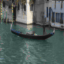

In [234]:
Image.fromarray( (255 * color.lab2rgb(colorized)).astype(np.uint8) )

In [235]:
def get_data_new(path):
  lt = time.time()
  img = io.imread(path)
  
  print "A0", (time.time() - lt)
  lt = time.time()
  
  resized_img = scipy.misc.imresize(img, (64,64))
  
  print "A1", (time.time() - lt)
  lt = time.time()
  
  img = color.rgb2lab(img)
  assert img.shape == (256,256,3)

  print "A2", (time.time() - lt)
  lt = time.time()
    
  image = img[:,:,0:1]
  img = color.rgb2lab(resized_img)
  colors = img[:,:,1:3]
  
  print "B", (time.time() - lt)
  lt = time.time()
  
  colors = np.tile( colors.reshape((64,64,1,2)), (1,1,313,1))
  
  print "C", (time.time() - lt)
  lt = time.time()
  
  big_quantized = np.tile( quantized_array, (64,64,1,1))
  
  print "D", (time.time() - lt)
  lt = time.time()
  
  aaa = colors - big_quantized
  
  print "E-1", (time.time() - lt)
  lt = time.time()
  
  aaaa = np.square(aaa)
  
  print "E0", (time.time() - lt)
  lt = time.time()
  
  distances = np.sum(aaaa, axis=3)
  
  print "E1", (time.time() - lt)
  lt = time.time()
  
  d = distances.copy()
  
  print "E2", (time.time() - lt)
  lt = time.time()
  
  for i in range(5):
    if i == 4:
      distance_cap = np.min(d, axis=2)
    else:
      
      print "EP", (time.time() - lt)
      lt = time.time()
      
      v = np.argmin(d, axis=2)
      
      print "EZ", (time.time() - lt)
      lt = time.time()
      
      d[:,:,v] = 0
      
      print "EK", (time.time() - lt)
      lt = time.time()

  
  print "E3", (time.time() - lt)
  lt = time.time()
  
  print distance_cap.shape
  
  low_values = (distances > np.tile( distance_cap.reshape((64, 64, 1)), (1,1,313) ))#d[:,:,4:5]
  
  print "E4", (time.time() - lt)
  lt = time.time()
  
  gaussian_distances = gaussian(distances, 5)
  
  print "F1", (time.time() - lt)
  lt = time.time()
  
  gaussian_distances[low_values] = 0
  
  print "F2", (time.time() - lt)
  lt = time.time()
  
  output = gaussian_distances / np.sum(gaussian_distances, axis = 2).reshape((64,64,1))
  
  print "F3", (time.time() - lt)
  lt = time.time()
  
  return image, output